In this project I will be exploring a dataset based on movie data from the years 2012 to 2016. The data consist of information about the movie such as title, release date, url, genre, director, cast, budget and revenue. I will be performing data cleaning by removing columns that are not neccessary for analysis, data transformation by creating new date and month columns, data processing by creating a calculated column that measures profits of each movie, and building graphs and charts to visualize the data.

##### Importing libraries neccessary for analysis

In [2]:
import numpy as np      # for numerical calculations
import pandas as pd     # for reading in and converting data into dataframes
pd.set_option("display.max_columns", None)      # for altering viewing options of data
import matplotlib.pyplot as plt     # for building graphs and charts for visualizations
from matplotlib import style        # for altering and changing the style of visualizations
%matplotlib inline     
import seaborn as sns   # for enhanced visualizations


Creating a variable for data and reading data into dataframe

In [3]:
movies = pd.read_csv(r"C:\Users\Jason\OneDrive\Movie-Data.csv")

Checking the number of columns and rows in data

In [4]:
movies.shape
print(f"This dataset has {movies.shape[0]} rows and {movies.shape[1]} columns.")

This dataset has 508 rows and 13 columns.


Viewing the first 5 rows of data

In [5]:
movies.head(5)

,Movie Title,Release Date,Wikipedia URL,Genre,Director (1),Director (2),Cast (1),Cast (2),Cast (3),Cast (4),Cast (5),Budget,Revenue
0,10 Cloverfield Lane,3/8/2016,https://en.wikipedia.org/wiki/10_Cloverfield_Lane,Thriller,Dan Trachtenberg,NaN,Mary Elizabeth Winstead,John Goodman,John Gallagher,NaN,NaN,15000000,108300000
1,13 Hours: The Secret Soldiers of Benghazi,1/15/2016,https://en.wikipedia.org/wiki/13_Hours:_The_Se...,Action,Michael Bay,NaN,James Badge Dale,John Krasinski,Toby Stephens,Pablo Schreiber,Max Martini,45000000,69400000
2,2 Guns,8/2/2013,https://en.wikipedia.org/wiki/2_Guns,Action,Baltasar Kormákur,NaN,Mark Wahlberg,Denzel Washington,Paula Patton,Bill Paxton,Edward James Olmos,61000000,131900000
3,21 Jump Street,3/16/2012,https://en.wikipedia.org/wiki/21_Jump_Street_(...,Comedy,Phil Lord,Chris Miller,Jonah Hill,Channing Tatum,Ice Cube,Brie Larson,Rob Riggle,55000000,201500000
4,22 Jump Street,6/4/2014,https://en.wikipedia.org/wiki/22_Jump_Street,Action,Phil Lord,Chris Miller,Channing Tatum,Jonah Hill,Ice Cube,NaN,NaN,84500000,331300000


Viewing the last 5 rows of data

In [6]:
movies.tail(5)

,Movie Title,Release Date,Wikipedia URL,Genre,Director (1),Director (2),Cast (1),Cast (2),Cast (3),Cast (4),Cast (5),Budget,Revenue
503,X-Men: Days of Future Past,5/10/2014,https://en.wikipedia.org/wiki/X-Men:_Days_of_F...,Action,Bryan Singer,NaN,Hugh Jackman,James McAvoy,Michael Fassbender,Halle Berry,Jennifer Lawrence,200000000,747900000
504,You're Next,8/23/2013,https://en.wikipedia.org/wiki/You%2527re_Next,Horror,Adam Wingard,NaN,Sharni Vinson,Joe Swanberg,AJ Bowen,Nicholas Tucci,Barbara Crampton,1000000,26800000
505,Zero Dark Thirty,12/19/2012,https://en.wikipedia.org/wiki/Zero_Dark_Thirty,Drama,Kathryn Bigelow,NaN,Jessica Chastain,Chris Pratt,Joel Edgerton,Kyle Chandler,Jason Clarke,40000000,132800000
506,Zhong Kui: Snow Girl and the Dark Crystal,2/19/2015,https://en.wikipedia.org/wiki/Zhong_Kui:_Snow_...,Romance,Peter Pau,NaN,Li Bingbing,Chen Kun,Yang Zishan,Winston Chao,Bao Bei'er,30000000,64470000
507,Zoolander 2,2/12/2016,https://en.wikipedia.org/wiki/Zoolander_2,Comedy,Ben Stiller,NaN,Ben Stiller,Owen Wilson,Christine Taylor,Will Ferrell,Penélope Cruz,50000000,56000000


Checking the datatypes of columns

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Movie Title    508 non-null    object
 1   Release Date   508 non-null    object
 2   Wikipedia URL  508 non-null    object
 3   Genre          508 non-null    object
 4   Director (1)   508 non-null    object
 5   Director (2)   41 non-null     object
 6   Cast (1)       508 non-null    object
 7   Cast (2)       503 non-null    object
 8   Cast (3)       485 non-null    object
 9   Cast (4)       452 non-null    object
 10  Cast (5)       389 non-null    object
 11  Budget         508 non-null    int64 
 12  Revenue        508 non-null    int64 
dtypes: int64(2), object(11)
memory usage: 51.7+ KB


Getting release date, budget, and revenue columns in the correct format and adding new columns release day, month, and year

In [66]:
movies["Budget"] = movies["Budget "].astype(int)
movies["Revenue"] = movies["Revenue"].astype(int)
movies["Release Date"] = pd.to_datetime(movies["Release Date"])
movies["Release Day"] = movies["Release Date"].dt.day_name()
movies["Release Month"] = movies["Release Date"].dt.month_name()
movies["Release Year"] = movies["Release Date"].dt.year

Rechecking the datatypes to verify that the date column has been updated

In [67]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Movie Title    508 non-null    object        
 1   Release Date   508 non-null    datetime64[ns]
 2   Wikipedia URL  508 non-null    object        
 3   Genre          508 non-null    object        
 4   Director (1)   508 non-null    object        
 5   Director (2)   41 non-null     object        
 6   Cast (1)       508 non-null    object        
 7   Cast (2)       503 non-null    object        
 8   Cast (3)       485 non-null    object        
 9   Cast (4)       452 non-null    object        
 10  Cast (5)       389 non-null    object        
 11  Budget         508 non-null    int64         
 12  Revenue        508 non-null    int32         
 13  Budget         508 non-null    int32         
 14  Release Day    508 non-null    object        
 15  Release Month  508 non-

Viewing the statistical data for numerical variables

In [68]:
movies.describe()

,Budget,Revenue,Budget,Release Year,Profit
count,5.080000e+02,5.080000e+02,5.080000e+02,508.000000,5.080000e+02
mean,4.887140e+07,1.519832e+08,4.887140e+07,2013.950787,1.031118e+08
std,4.919859e+07,1.832555e+08,4.919859e+07,1.352746,1.493740e+08
min,1.000000e+06,1.000000e+06,1.000000e+06,2012.000000,-5.860000e+07
25%,1.400000e+07,3.110000e+07,1.400000e+07,2013.000000,5.650000e+06
50%,3.000000e+07,7.935000e+07,3.000000e+07,2014.000000,4.880000e+07
75%,6.500000e+07,2.037250e+08,6.500000e+07,2015.000000,1.384750e+08
max,2.500000e+08,9.708000e+08,2.500000e+08,2016.000000,8.948000e+08


Viewing the statistical data for categorical variables

In [69]:
movies.describe(include="object")

,Movie Title,Wikipedia URL,Genre,Director (1),Director (2),Cast (1),Cast (2),Cast (3),Cast (4),Cast (5),Release Day,Release Month
count,508,508,508,508,41,508,503,485,452,389,508,508
unique,508,508,17,414,39,345,402,412,407,353,7,12
top,10 Cloverfield Lane,https://en.wikipedia.org/wiki/10_Cloverfield_Lane,Action,David Ayer,Chris Miller,Tom Cruise,Gary Oldman,Rose Byrne,Anthony Mackie,Ray Liotta,Friday,September
freq,1,1,120,4,3,5,4,4,4,4,323,60


Checking for duplicated data

In [70]:
movies.duplicated().sum()
print(f"There are {movies.duplicated().sum()} rows of duplicated data.")

There are 0 rows of duplicated data.


Checking the unique values in dataset

In [71]:
for col in movies.columns:
    unique_values = movies[col].nunique()
    print(f"The column {col} has {unique_values} unique values.")

The column Movie Title has 508 unique values.
The column Release Date has 330 unique values.
The column Wikipedia URL has 508 unique values.
The column Genre has 17 unique values.
The column Director (1) has 414 unique values.
The column Director (2) has 39 unique values.
The column Cast (1) has 345 unique values.
The column Cast (2) has 402 unique values.
The column Cast (3) has 412 unique values.
The column Cast (4) has 407 unique values.
The column Cast (5) has 353 unique values.
The column Budget  has 147 unique values.
The column Revenue has 447 unique values.
The column Budget has 147 unique values.
The column Release Day has 7 unique values.
The column Release Month has 12 unique values.
The column Release Year has 5 unique values.
The column Profit has 454 unique values.


Checking the null values in dataset

In [72]:
for na in movies.columns:
    na_values = movies[na].isnull().sum()
    print(f"The column {na} has {na_values} null values.")

The column Movie Title has 0 null values.
The column Release Date has 0 null values.
The column Wikipedia URL has 0 null values.
The column Genre has 0 null values.
The column Director (1) has 0 null values.
The column Director (2) has 467 null values.
The column Cast (1) has 0 null values.
The column Cast (2) has 5 null values.
The column Cast (3) has 23 null values.
The column Cast (4) has 56 null values.
The column Cast (5) has 119 null values.
The column Budget  has 0 null values.
The column Revenue has 0 null values.
The column Budget has 0 null values.
The column Release Day has 0 null values.
The column Release Month has 0 null values.
The column Release Year has 0 null values.
The column Profit has 0 null values.


Creating a calculated column 

###### Subtracting the Revenue column from the Budget column to get the Profit column

In [73]:
movies["Profit"] = movies.Revenue - movies.Budget
movies["Profit"]


0       93300000
1       24400000
2       70900000
3      146500000
4      246800000
         ...    
503    547900000
504     25800000
505     92800000
506     34470000
507      6000000
Name: Profit, Length: 508, dtype: int32

Creating a new dataframe to be used with only the columns that are most useful for analysis

In [74]:
movies_cleaned = movies[['Movie Title', 'Genre', 'Release Date', 'Budget', 'Revenue', 'Profit', 'Release Year', 'Release Month', 'Release Day',]]

Viewing the first 5 rows of new dataframe

In [75]:
movies_cleaned.head(5)

,Movie Title,Genre,Release Date,Budget,Revenue,Profit,Release Year,Release Month,Release Day
0,10 Cloverfield Lane,Thriller,2016-03-08,15000000,108300000,93300000,2016,March,Tuesday
1,13 Hours: The Secret Soldiers of Benghazi,Action,2016-01-15,45000000,69400000,24400000,2016,January,Friday
2,2 Guns,Action,2013-08-02,61000000,131900000,70900000,2013,August,Friday
3,21 Jump Street,Comedy,2012-03-16,55000000,201500000,146500000,2012,March,Friday
4,22 Jump Street,Action,2014-06-04,84500000,331300000,246800000,2014,June,Wednesday


Viewing the last 5 rows of new dataframe

In [76]:
movies_cleaned.tail(5)

,Movie Title,Genre,Release Date,Budget,Revenue,Profit,Release Year,Release Month,Release Day
503,X-Men: Days of Future Past,Action,2014-05-10,200000000,747900000,547900000,2014,May,Saturday
504,You're Next,Horror,2013-08-23,1000000,26800000,25800000,2013,August,Friday
505,Zero Dark Thirty,Drama,2012-12-19,40000000,132800000,92800000,2012,December,Wednesday
506,Zhong Kui: Snow Girl and the Dark Crystal,Romance,2015-02-19,30000000,64470000,34470000,2015,February,Thursday
507,Zoolander 2,Comedy,2016-02-12,50000000,56000000,6000000,2016,February,Friday


Answering questions related to the dataset

###### What were the top 10 movies that had the highest budget?

In [77]:
movies_cleaned.groupby("Movie Title")["Budget"].max().sort_values(ascending=False)[:10]

Movie Title
The Hobbit: The Battle of the Five Armies    250000000
Batman v Superman: Dawn of Justice           250000000
Dawn of the Planet of the Apes               235000000
The Amazing Spider-Man                       230000000
Man of Steel                                 225000000
Battleship                                   220000000
Men in Black 3                               215000000
X-Men: Days of Future Past                   200000000
Pacific Rim                                  190000000
World War Z                                  190000000
Name: Budget, dtype: int32

The movies 'Batman v Superman: Dawn of Justice', and 'The Hobbit: The Battle of the Five Armies' tied for the highest movie budget 
with $250 million dollar budgets.


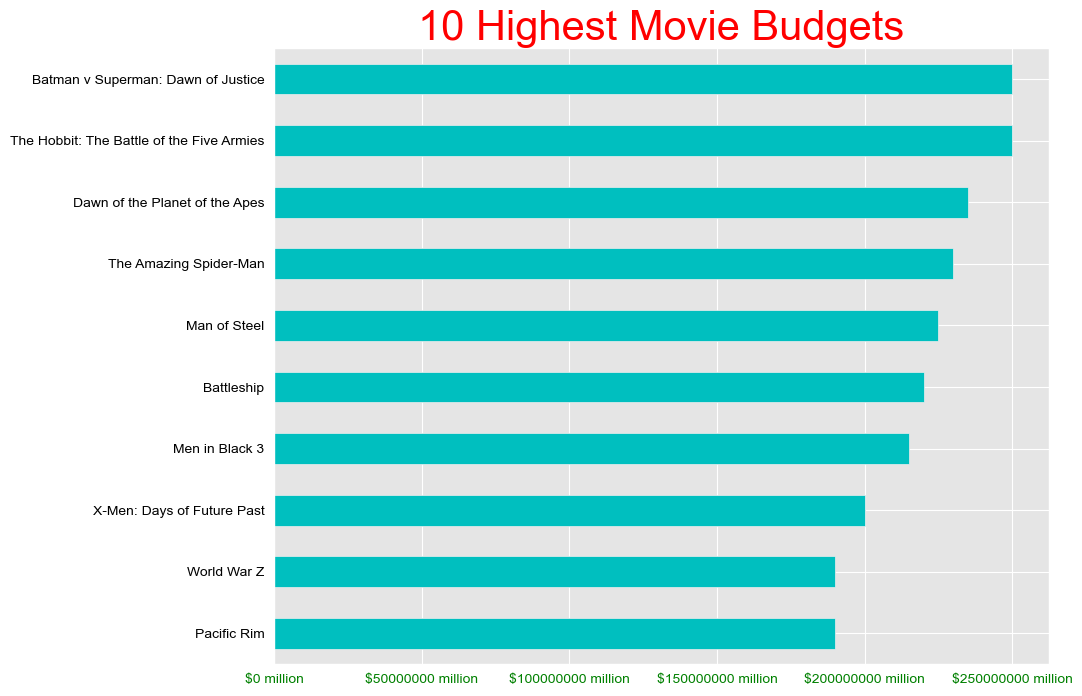

In [181]:
plt.figure(figsize=(10,8))
movies_cleaned.groupby("Movie Title")["Budget"].max().sort_values(ascending=False)[:10].sort_values(ascending=True).plot(kind="barh", color="c")
plt.title("10 Highest Movie Budgets", color="red", fontsize=30)
ticks = list(range(0,300000000,50000000))
plt.yticks(color="black")
plt.ylabel("")
plt.xlabel("")
plt.xticks(ticks, [f"${x} million" for x in ticks], color="green")
sns.set_style("darkgrid")
style.use("ggplot") 
print("""The movies 'Batman v Superman: Dawn of Justice', and 'The Hobbit: The Battle of the Five Armies' tied for the highest movie budget 
with $250 million dollar budgets.""")

###### What were the genres of the 10 highest movie budgets?

In [161]:
movies_cleaned.groupby(["Genre", "Movie Title"])["Budget"].max().sort_values(ascending=False)[:10]

Genre      Movie Title                              
Action     Batman v Superman: Dawn of Justice           250000000
Adventure  The Hobbit: The Battle of the Five Armies    250000000
Action     Dawn of the Planet of the Apes               235000000
           The Amazing Spider-Man                       230000000
           Man of Steel                                 225000000
           Battleship                                   220000000
Comedy     Men in Black 3                               215000000
Action     X-Men: Days of Future Past                   200000000
           Pacific Rim                                  190000000
           World War Z                                  190000000
Name: Budget, dtype: int32

###### What are the highest movie budgets by movie genre and release year?

In [173]:
movies_cleaned.groupby(["Genre", "Release Year"])["Budget"].max()

Genre     Release Year
Action    2012            230000000
          2013            225000000
          2014            235000000
          2015            150000000
          2016            250000000
                            ...    
Thriller  2012             26000000
          2013             20000000
          2014             55000000
          2015            135000000
          2016             90000000
Name: Budget, Length: 68, dtype: int32

The action genre in the year 2016 and the adventure genre in the year 2014 produced the highest movie budgets being $250 million 
dollars. While the musical genre in 2015 and the religious genre in 2016 had the lowest movie budgets.


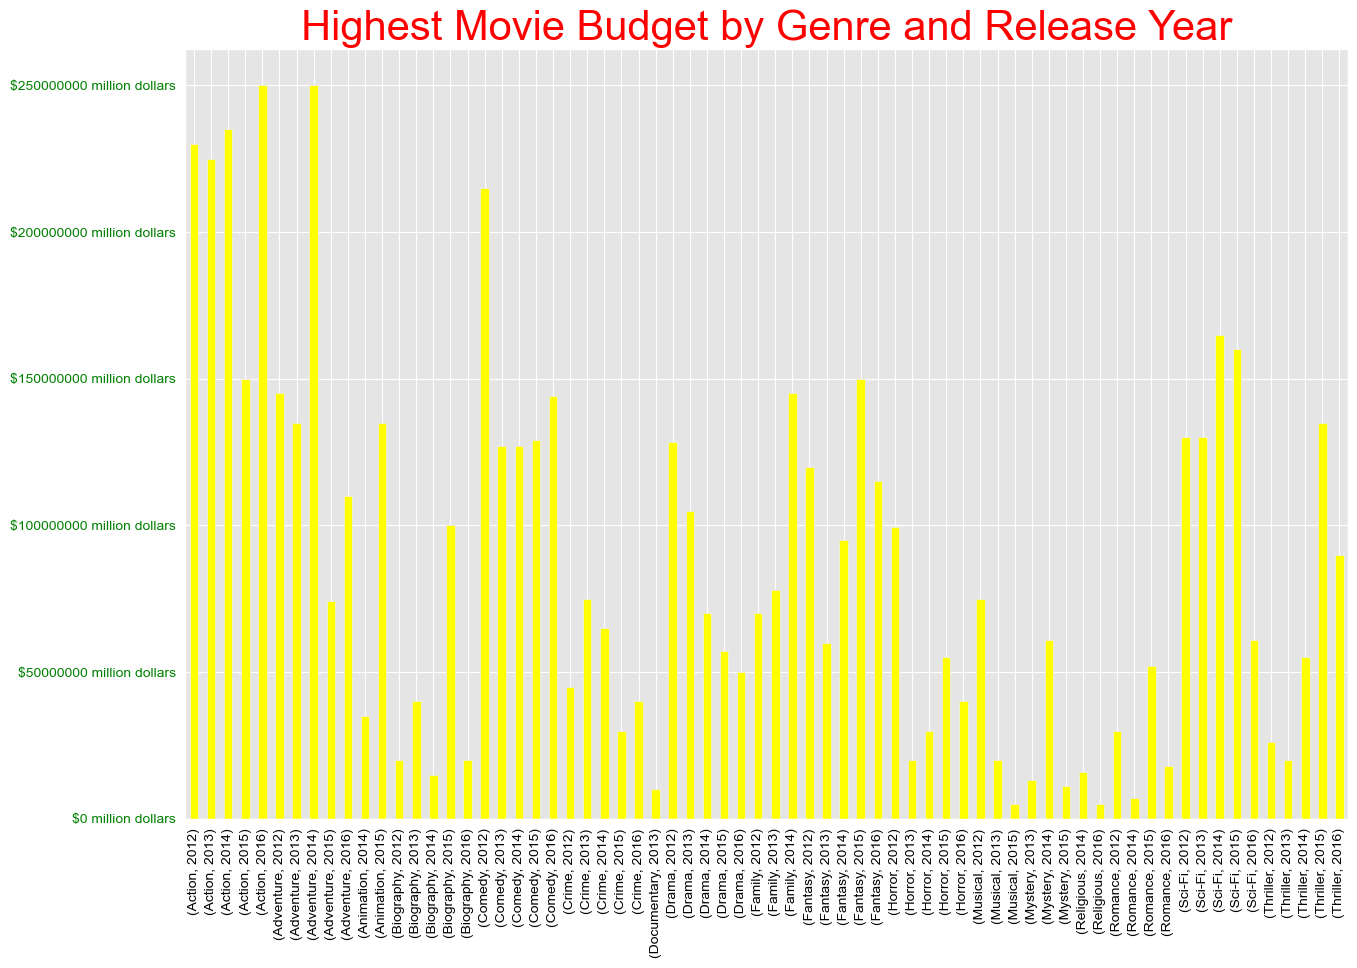

In [193]:
plt.figure(figsize=(15,10))
movies_cleaned.groupby(["Genre", "Release Year"])["Budget"].max().plot(kind="bar", color="yellow")
plt.title("Highest Movie Budget by Genre and Release Year", color="red", fontsize=30)
ticks = list(range(0, 300000000, 50000000))
plt.yticks(ticks, [f"${x} million dollars" for x in ticks], color="green") 
plt.xlabel("")
plt.xticks(color="black") 
sns.set_style("darkgrid") 
style.use("ggplot") 
print("""The action genre in the year 2016 and the adventure genre in the year 2014 produced the highest movie budgets being $250 million 
dollars. While the musical genre in 2015 and the religious genre in 2016 had the lowest movie budgets.""")

###### What were the highest movie budgets by year?

In [162]:
movies_cleaned.groupby("Release Year")["Budget"].max()

Release Year
2012    230000000
2013    225000000
2014    250000000
2015    160000000
2016    250000000
Name: Budget, dtype: int32

The years 2014 and 2016 had the highest movie budgets and the year 2015 had the lowest movie budget.


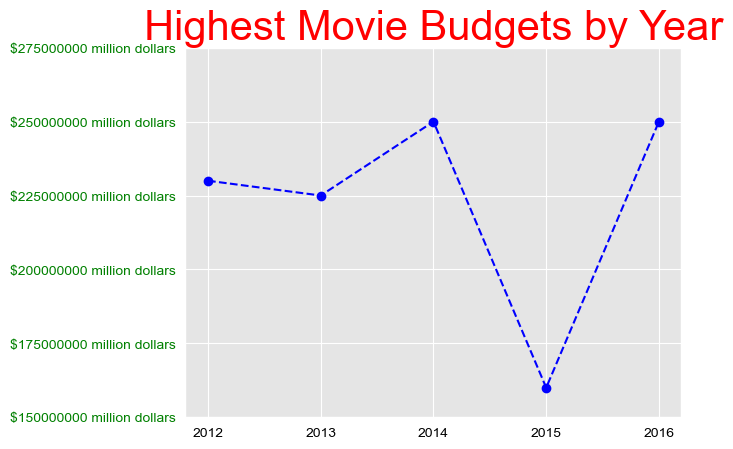

In [198]:
movies_cleaned.groupby("Release Year")["Budget"].max().plot(kind="line", linestyle="--", marker="o", label="line with marker", color="blue")
plt.title("Highest Movie Budgets by Year", color="red", fontsize=30)
ticks = list(range(150000000, 300000000, 25000000))
plt.yticks(ticks, [f"${x} million dollars" for x in ticks], color="green")
years = list(range(2012, 2017, 1))
plt.xticks(years, [f"{y}" for y in years], color="black")
plt.xlabel("") 
sns.set_style("darkgrid") 
style.use("ggplot") 
print("The years 2014 and 2016 had the highest movie budgets and the year 2015 had the lowest movie budget.") 

###### What year had the highest percentage of the average movie budget by year?

2016 had the highest percentage of the average movie budget by year.


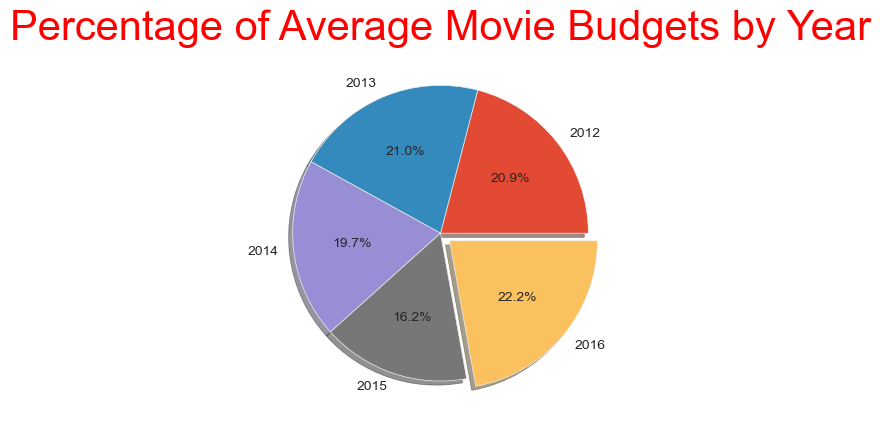

In [276]:
e = [0, 0, 0, 0, 0.08]
movies_cleaned.groupby("Release Year")["Budget"].mean().plot(kind="pie", autopct="%1.1f%%", shadow=True, explode=e)
plt.title("Percentage of Average Movie Budgets by Year", color="red", fontsize=30) 
plt.ylabel("") 
plt.xticks(color="black") 
sns.set_style("darkgrid") 
style.use("ggplot") 
print("2016 had the highest percentage of the average movie budget by year.") 

###### What were the top 10 movies that had the highest profits?

In [231]:
movies_cleaned.groupby("Movie Title")["Profit"].max().sort_values(ascending=False)[:10]

Movie Title
Despicable Me 2                              894800000
Ice Age: Continental Drift                   782000000
Deadpool                                     724600000
The Twilight Saga: Breaking Dawn – Part 2    709700000
The Hobbit: The Battle of the Five Armies    706000000
The Secret Life of Pets                      649900000
The Hunger Games: Mockingjay – Part 1        630400000
Fast & Furious 6                             628700000
Batman v Superman: Dawn of Justice           622700000
The Hunger Games                             616400000
Name: Profit, dtype: int32

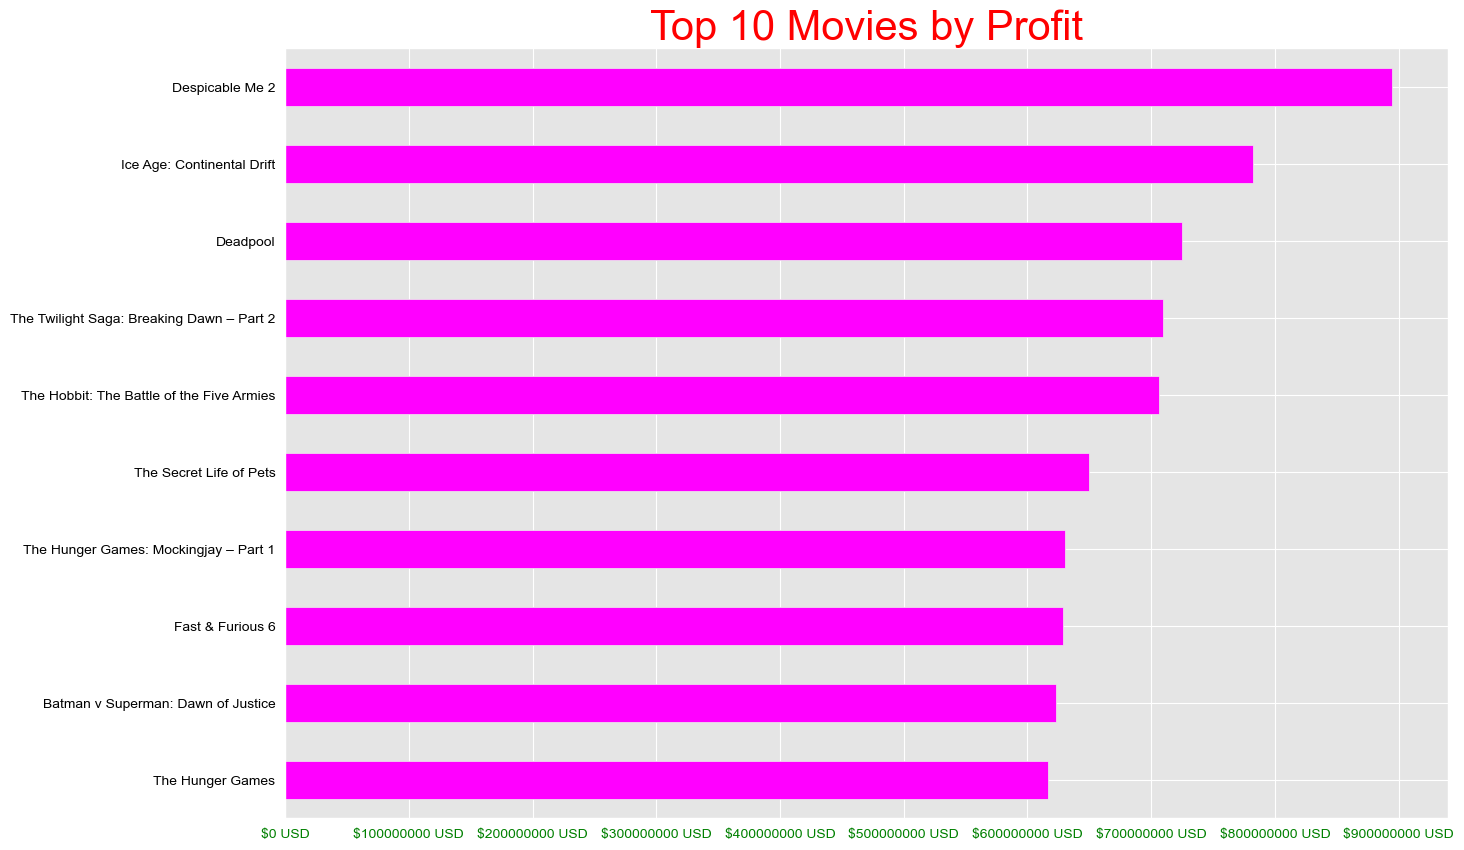

In [232]:
plt.figure(figsize=(15, 10))
data=movies_cleaned.groupby("Movie Title")["Profit"].max().sort_values(ascending=False)[:10].sort_values(ascending=True).plot(kind="barh", color="magenta")
plt.title("Top 10 Movies by Profit", color="red", fontsize=30)
ticks = list(range(0, 950000000, 100000000))
plt.xticks(ticks, [f"${x} USD" for x in ticks], color="green") 
plt.xlabel("") 
plt.ylabel("") 
plt.yticks(color="black") 
sns.set_style("darkgrid") 
style.use("ggplot") 

###### What were the highest profits by genre and year? 

In [236]:
movies_cleaned.groupby(["Genre", "Release Year"])["Profit"].max().sort_values(ascending=False)

Genre      Release Year
Comedy     2013            894800000
Adventure  2012            782000000
Action     2016            724600000
Fantasy    2012            709700000
Adventure  2014            706000000
                             ...    
Crime      2016              3400000
Fantasy    2013               100000
Musical    2015             -2700000
           2013             -3500000
Biography  2012            -11700000
Name: Profit, Length: 68, dtype: int32

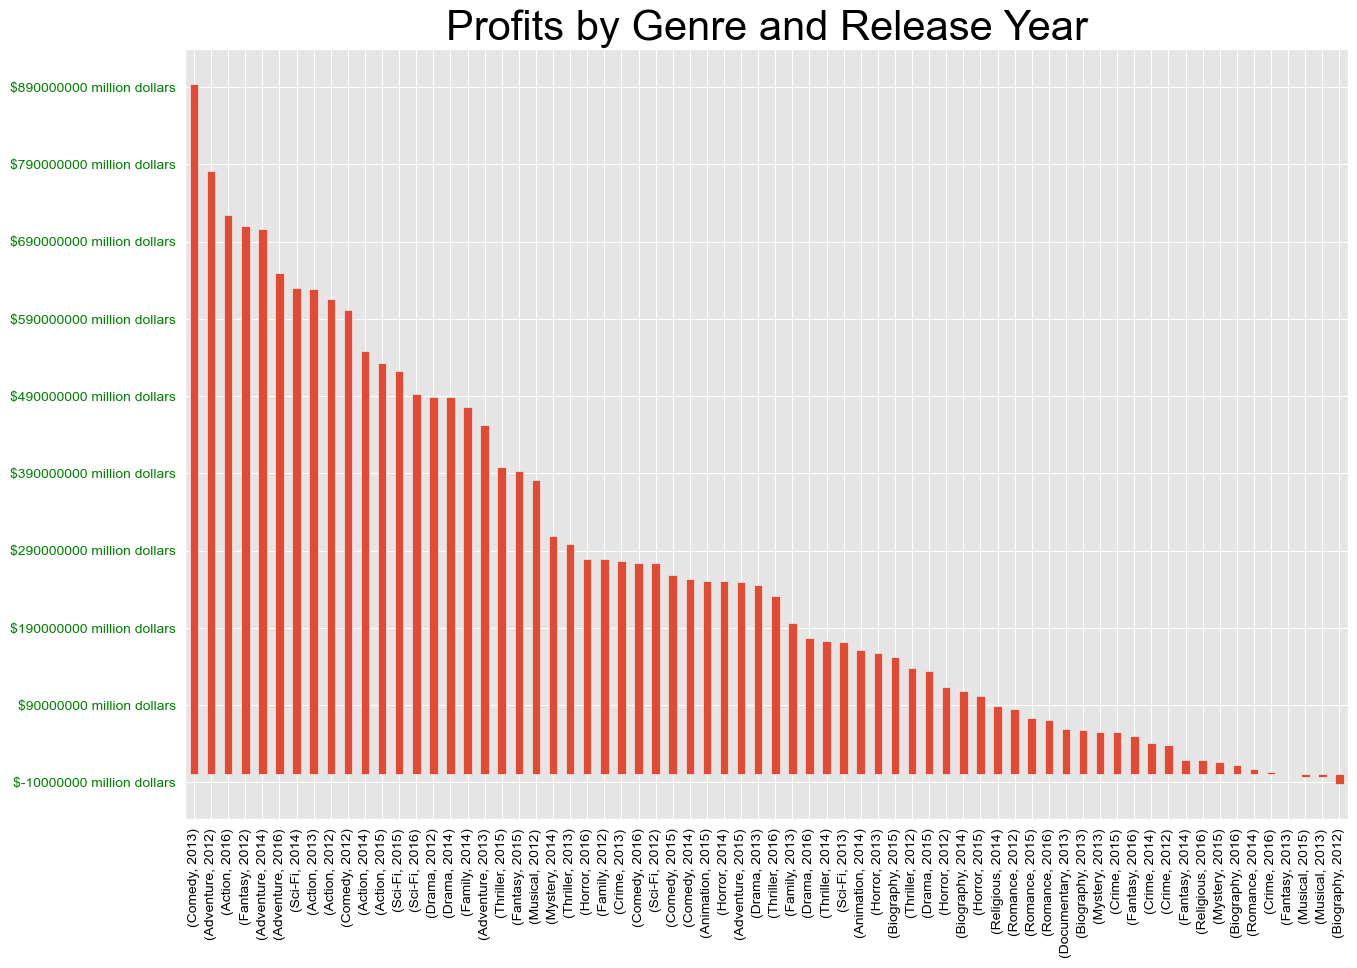

In [240]:
plt.figure(figsize=(15, 10))
movies_cleaned.groupby(["Genre", "Release Year"])["Profit"].max().sort_values(ascending=False).plot(kind="bar")
plt.title("Profits by Genre and Release Year", color="black", fontsize=30)
ticks = list(range(-10000000, 900000000, 100000000))
plt.yticks(ticks, [f"${x} million dollars" for x in ticks], color="green") 
plt.ylabel("") 
plt.xticks(color="black")
plt.xlabel("") 
sns.set_style("darkgrid") 
style.use("ggplot") 

###### What are the top movie genres by profit?

In [241]:
movies_cleaned.groupby("Genre")["Profit"].max().sort_values(ascending=False)

Genre
Comedy         894800000
Adventure      782000000
Action         724600000
Fantasy        709700000
Sci-Fi         630400000
Drama          489000000
Family         476500000
Thriller       398000000
Musical        380800000
Mystery        308300000
Horror         279500000
Crime          276700000
Animation      251000000
Biography      151600000
Religious       89300000
Romance         84300000
Documentary     58500000
Name: Profit, dtype: int32

According to the graphic, we can see that the genre 'Comedy' has generated the highest profits. While the genre 'Documentary' has 
generated the lowest profits.


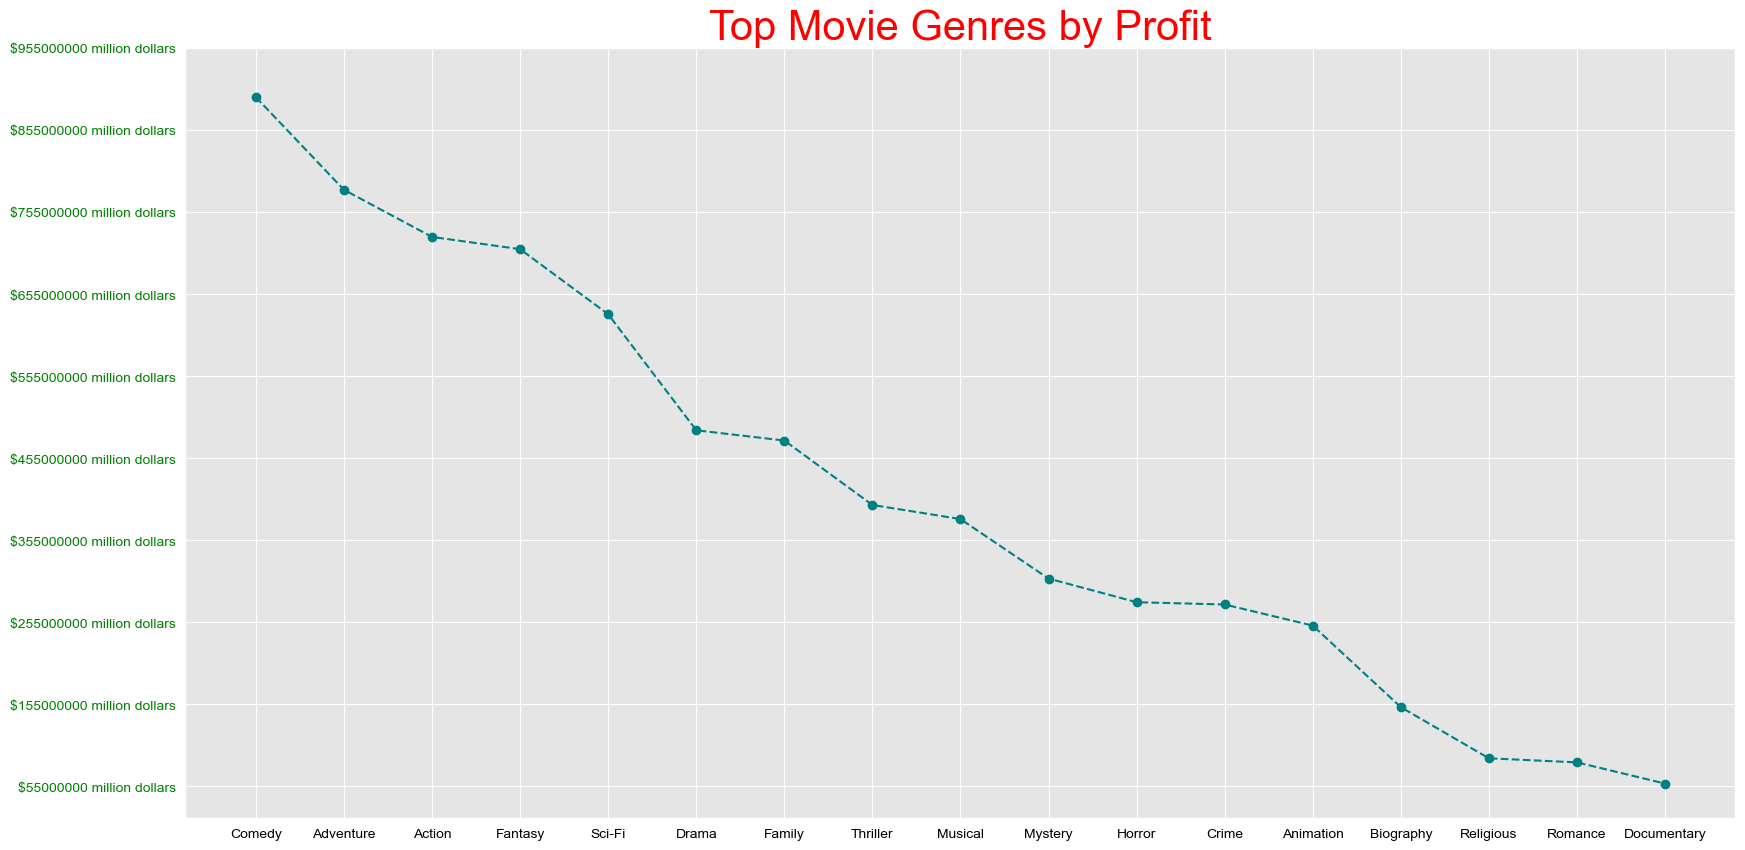

In [256]:
plt.figure(figsize=(20, 10))
movies_cleaned.groupby("Genre")["Profit"].max().sort_values(ascending=False).plot(kind="line", linestyle="--", marker="o", label="line with marker", color="teal")
plt.title("Top Movie Genres by Profit", color="red", fontsize=30)
ticks = list(range(55000000, 975000000, 100000000))
plt.yticks(ticks, [f"${x} million dollars" for x in ticks], color="green") 
plt.xlabel("") 
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], ["Comedy", "Adventure", "Action", "Fantasy", "Sci-Fi", "Drama", "Family", "Thriller", "Musical", "Mystery", "Horror", "Crime", "Animation", "Biography", "Religious", "Romance", "Documentary"], color="black")
sns.set_style("darkgrid") 
style.use("ggplot") 
print("""According to the graphic, we can see that the genre 'Comedy' has generated the highest profits. While the genre 'Documentary' has 
generated the lowest profits.""")

###### What are the profits for the bottom 10 movie titles per budget?

In [267]:
movies_cleaned.groupby("Movie Title")[["Budget", "Profit"]].min().sort_values(by="Budget", ascending=True)[:10]

,Budget,Profit
Movie Title,,
Chernobyl Diaries,1000000,36200000
Unfriended,1000000,63100000
You're Next,1000000,25800000
The Letters,1000000,600000
The Devil Inside,1000000,100800000
The Raid: Redemption ₪,1100000,8040000
Mustang,1300000,3600000
Embrace of the Serpent,1400000,1400000
Son of Saul,1500000,4700000


The movie title 'The Devil Inside' generated the highest profits out of the bottom 10 movies with the lowest budget.


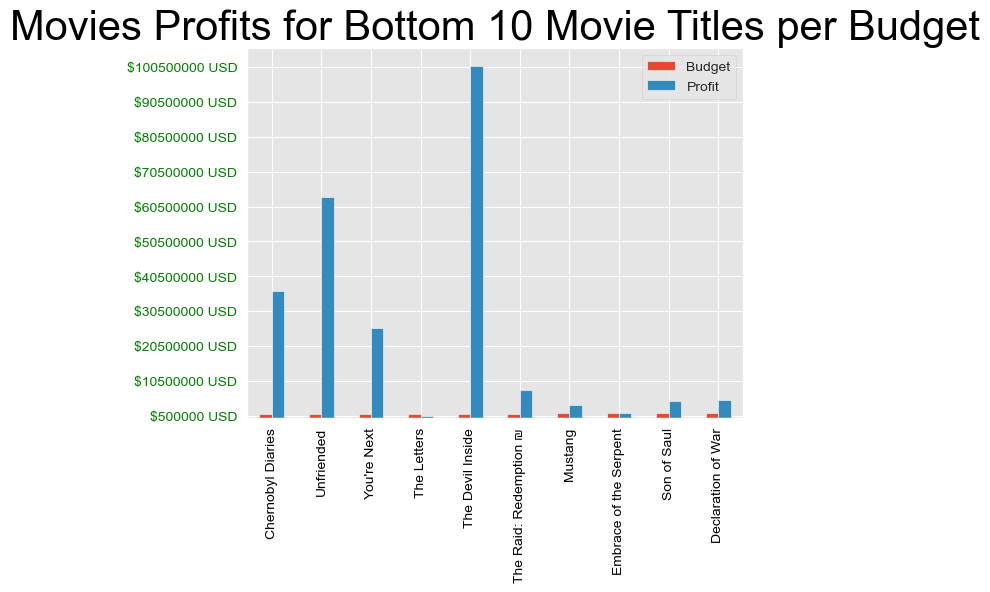

In [277]:
movies_cleaned.groupby("Movie Title")[["Budget", "Profit"]].min().sort_values(by="Budget", ascending=True)[:10].plot(kind="bar")
plt.title("Movies Profits for Bottom 10 Movie Titles per Budget", fontsize=30, color="black") 
ticks = list(range(500000, 101000000, 10000000))
plt.yticks(ticks, [f"${x} USD" for x in ticks], color="green") 
plt.xlabel("") 
plt.xticks(color="black") 
sns.set_style("darkgrid") 
style.use("ggplot") 
print("The movie title 'The Devil Inside' generated the highest profits out of the bottom 10 movies with the lowest budget.")

###### What year had the highest percentage of the average movie profits by year?

2014 had the highest percentage of the average movie profit by year.


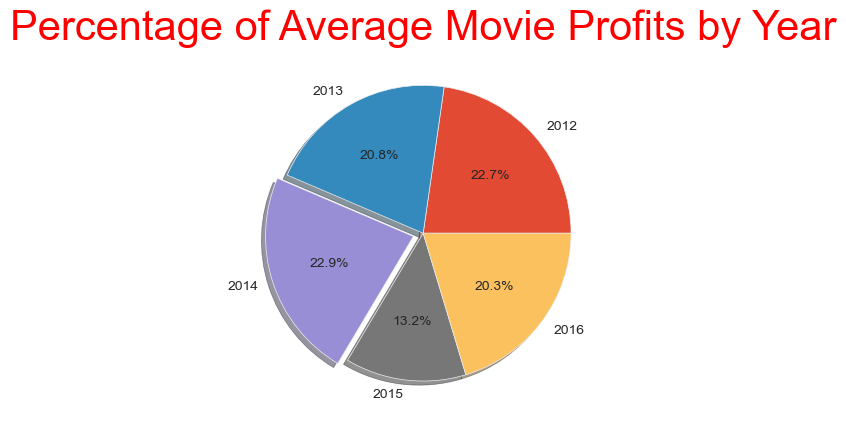

In [283]:
e = [0, 0, 0.07, 0, 0]
movies_cleaned.groupby("Release Year")["Profit"].mean().plot(kind="pie", autopct="%1.1f%%", shadow=True, explode=e) 
plt.title("Percentage of Average Movie Profits by Year", color="red", fontsize=30)
plt.ylabel("") 
plt.xticks(color="black")
sns.set_style("darkgrid") 
style.use("ggplot") 
print("2014 had the highest percentage of the average movie profit by year.") 

##### Looking at the budgets vs profits by year

Text(0.5, 0, '')

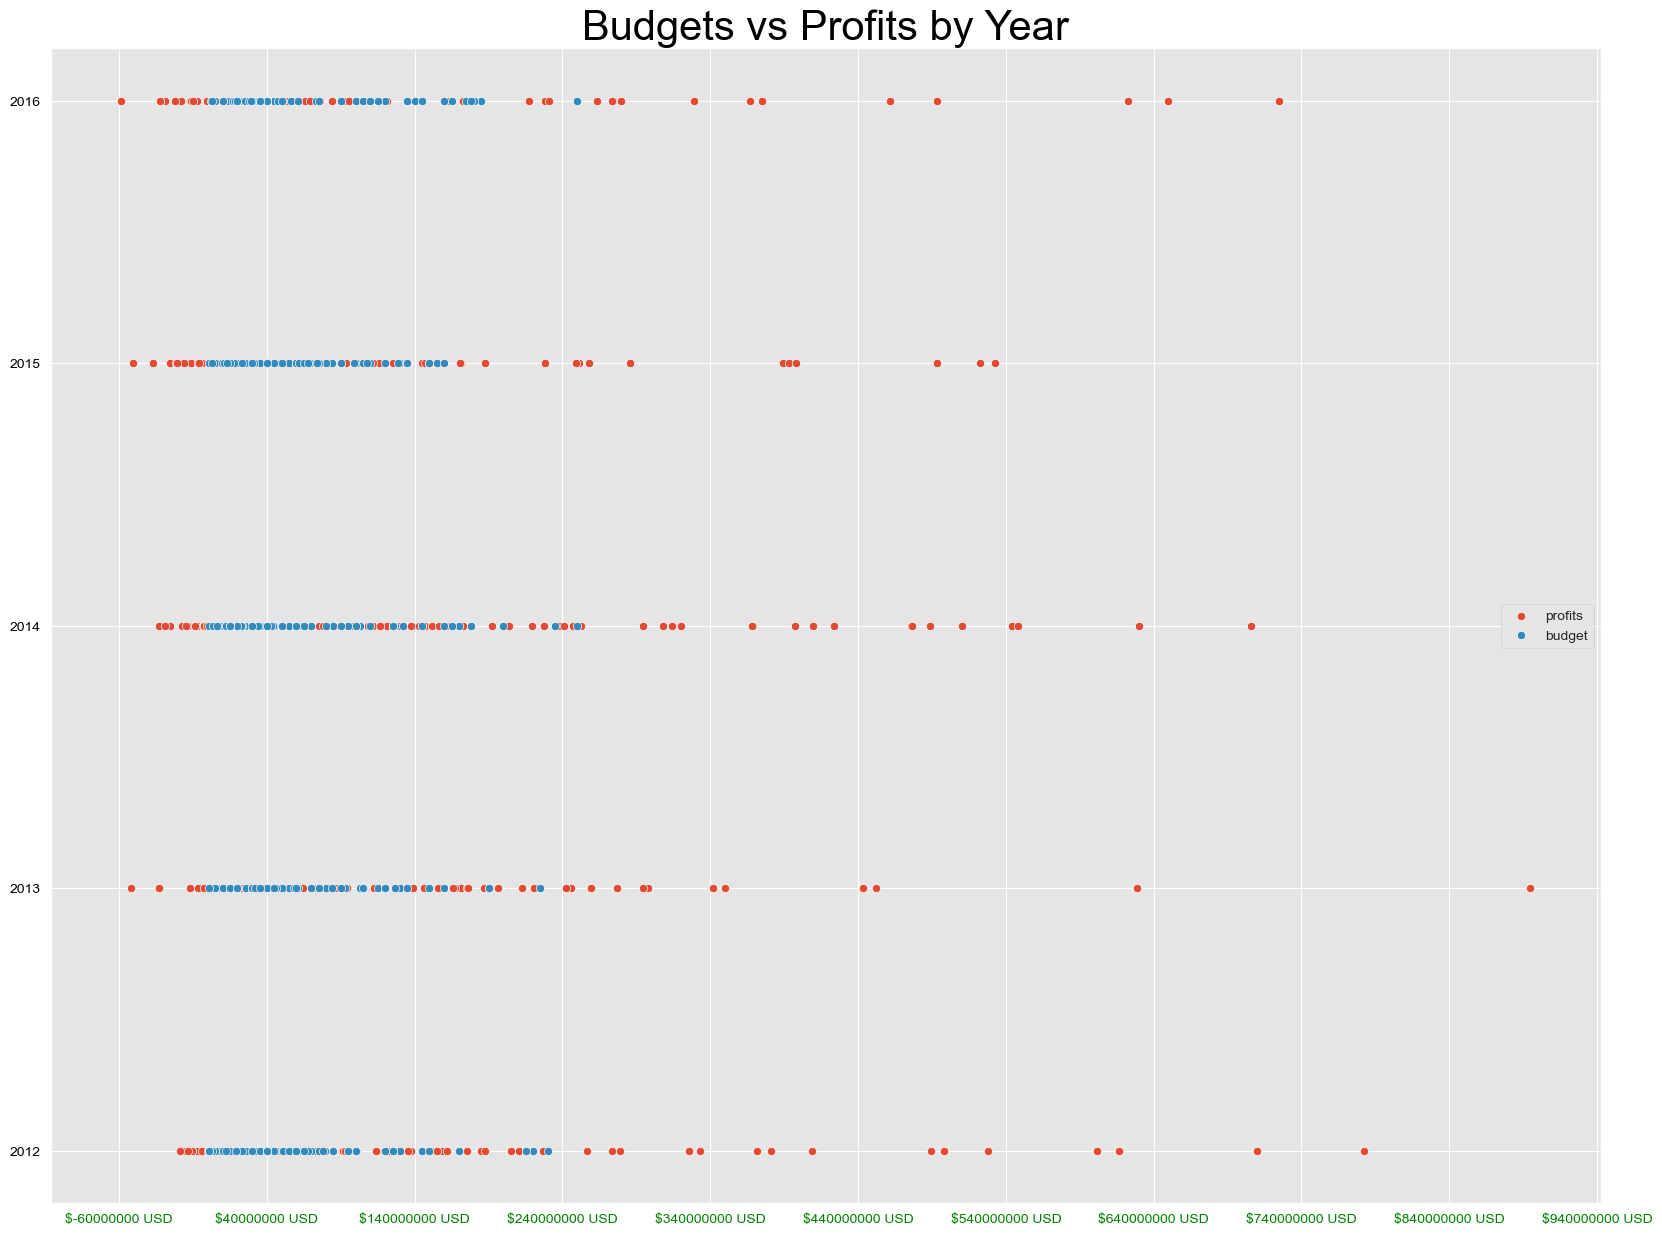

In [300]:
plt.figure(figsize=(20,15))
c = ["profits", "budget"]
sns.scatterplot(data=movies_cleaned, x=movies_cleaned["Profit"], y=movies_cleaned["Release Year"])
sns.scatterplot(data=movies_cleaned, x=movies_cleaned["Budget"], y=movies_cleaned["Release Year"])
plt.title("Budgets vs Profits by Year", fontsize=30, color="black") 
plt.legend(c, loc=5)
years = list(range(2012, 2017, 1))
plt.yticks(years, [f"{y}" for y in years], color="black")
plt.ylabel("") 
value = list(range(-60000000, 950000000, 100000000))
plt.xticks(value, [f"${v} USD" for v in value], color="green") 
plt.xlabel("") 

##### Looking at budget vs profit by genre

Text(0.5, 0, '')

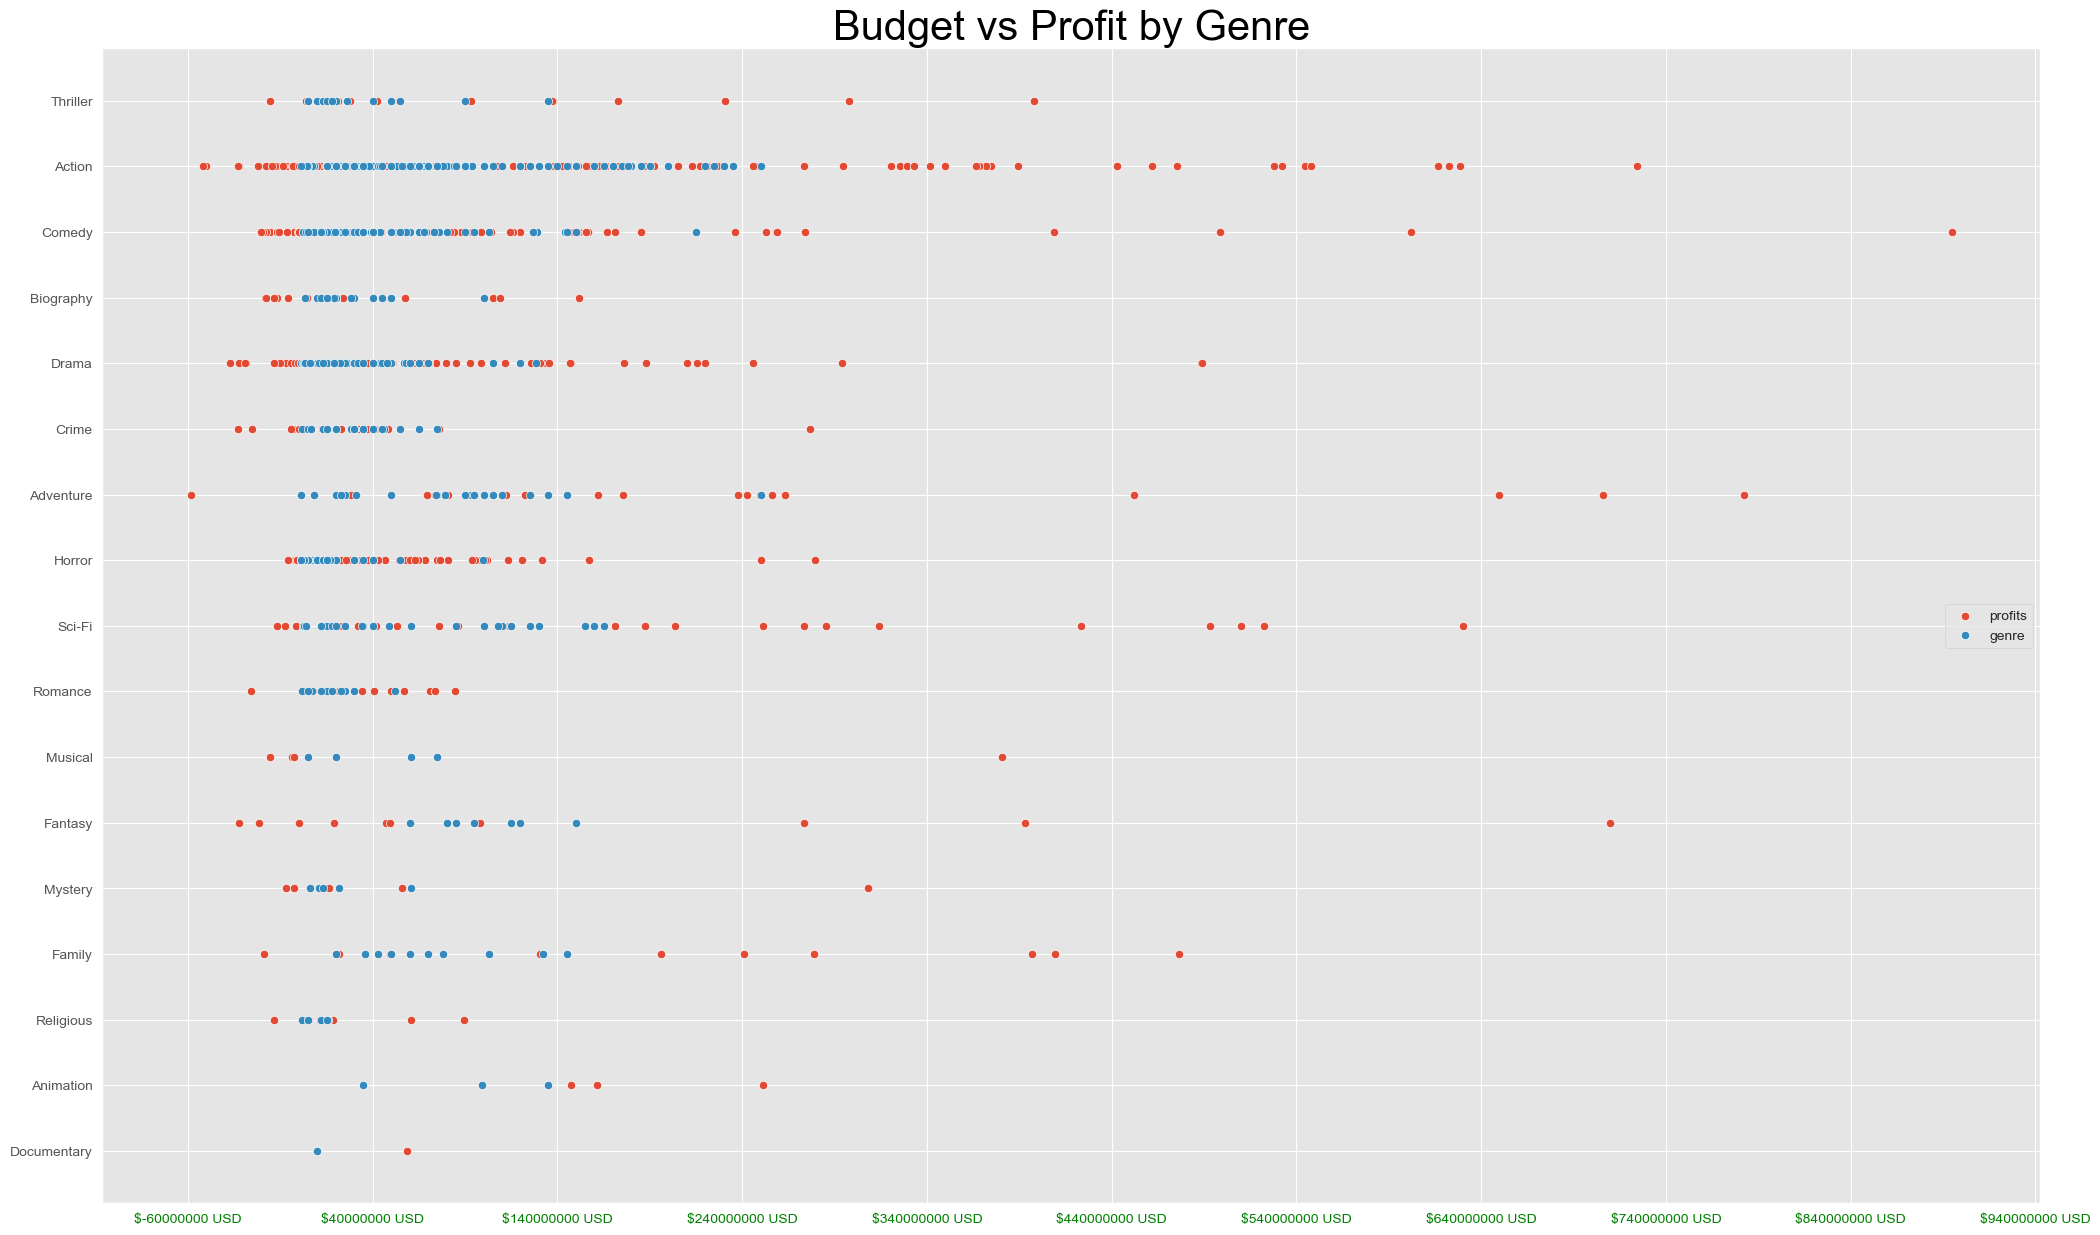

In [308]:
plt.figure(figsize=(25,15))
c = ["profits", "genre"]
sns.scatterplot(data=movies_cleaned, x=movies_cleaned["Profit"], y=movies_cleaned["Genre"])
sns.scatterplot(data=movies_cleaned, x=movies_cleaned["Budget"], y=movies_cleaned["Genre"])
plt.title("Budget vs Profit by Genre", fontsize=30, color="black") 
plt.legend(c, loc=5)
plt.ylabel("") 
value = list(range(-60000000, 975000000, 100000000))
plt.xticks(value, [f"${v} USD" for v in value], color="green") 
plt.xlabel("") 